In [2]:
from pylab import *
%matplotlib inline

In [3]:
def rk4(ec,p_ini,x,args=0,h=0.01):
    if (x[1]-x[0])<=5*h:
        h=(x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange (len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
         for i in xrange (len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    
    return tiempos,sol

In [4]:
def ec_mov(r_v,t,fricc=0,g=9.8,m=1):
    u = sqrt([r_v[2]**2 + r_v[3]**2])
    dx = r_v[2]
    dy = r_v[3]
    if fricc == 0:
        dvx,dvy = 0,-(g/m)
        #print "No use un modelo de friccion"
    else:
        dvx = - fricc([r_v[2],r_v[3]])[0]
        dvy = -(g/m) - fricc([r_v[2],r_v[3]])[1]
        #print "Use un modelo de friccion"
    return array([dx,dy,dvx,dvy])

In [5]:
def fricc_id(v):
    return array([0,0])

def fricc_v(v,gamma=0.1):
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y])

def fricc_v2(v,gamma=0.1):
    norma_v = sqrt(v[0]**2 + v[1]**2)
    f_x = gamma*norma_v*v[0]
    f_y = gamma*norma_v*v[1]
    return array([f_x,f_y])

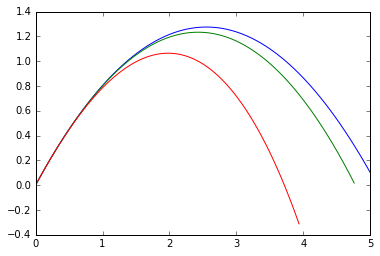

In [6]:
p=[0,0,5,5]
t,sol_id=rk4(ec_mov,p,[0,1])
t,sol_fv=rk4(ec_mov,p,[0,1],fricc_v)
t,sol_fv2=rk4(ec_mov,p,[0,1],fricc_v2)
plot(sol_id[:,0],sol_id[:,1])
plot(sol_fv[:,0],sol_fv[:,1])
plot(sol_fv2[:,0],sol_fv2[:,1])
show()

In [7]:
print ec_mov([1,1,1,1],1)
print ec_mov([1,1,1,1],1,fricc_id)
print ec_mov([1,1,1,1],1,fricc_v)
print ec_mov([1,1,1,1],1,fricc_v2)

[ 1.   1.   0.  -9.8]
[ 1.   1.   0.  -9.8]
[ 1.   1.  -0.1 -9.9]
[ 1.          1.         -0.14142136 -9.94142136]


In [8]:
print sol_fv2[80,:][1]
print sol_fv2[-1,:][1]

0.486963819865
-0.311193109272


In [20]:
def rebote(rv_i,mi_dt):   
    dt_b=mi_dt/2
    y_izq=rv_i #vector de posicion inicial
    t,sol=rk4(ec_mov,rv_i,[0,dt_b],fricc_v)
    y_med=sol[-1,:]
    while abs(y_izq[1]) > 1e-5:
        if y_izq[1]*y_med[1] < 0:
            reinicio=y_izq
        else:
            reinicio=y_med
        dt_b=dt_b/2
        t,sol=rk4(ec_mov,reinicio,[0,dt_b],fricc_v)
        y_izq=reinicio
        y_med=sol[-1,:]
    y_izq=array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
    return y_izq 

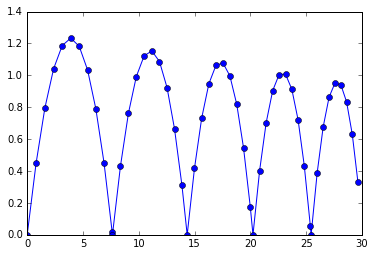

In [33]:
inicio=[0,0,8,5]
N=50
trayectoria = zeros((N,len(inicio))) #matrices vacias 
trayectoria[0,:]=array(inicio) #trayectoria[1,:]=array([1,2,3,4]) #se llena la fila 1
mi_dt=.1
for i in range(N-1):
    t,sol_dt=rk4(ec_mov,trayectoria[i,:],[0,mi_dt],fricc_v)
    if sol_dt[-1,:][1] < 0 :
        punto=rebote(trayectoria[i,:],mi_dt)
        trayectoria[i+1,:]= punto
    else:
        trayectoria[i+1,:]=sol_dt[-1,:]

#plot(sol_fv[:,0],sol_fv[:,1])       
plot(trayectoria[:,0],trayectoria[:,1],'o-')

show()